TP1 Part 2

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [475]:
def g(x):
    return(1.5*x**3-x**2-0.75*x+1)


def plot_points(x,y,g=None): #Will be used more than once
        
    plt.scatter(x,y,marker="+", label = "Observations")
    if g is not None:
        t=np.linspace(-1,1,100)
        z=g(t)
        plt.plot(t,z, color='red', label="Original")
    plt.legend()
    
def generate_data(nbpts,g, order=1, window=(-1,1)): #to generate datasets with features like in Q10
    x=np.random.uniform(window[0],window[1],nbpts)
    K=np.random.normal(0,1,nbpts) #Strong White Noise
    y=g(x)+0.05*K
    
    x=PolynomialFeatures(order,include_bias=True).fit_transform(x[:,np.newaxis])
    return (x,y)

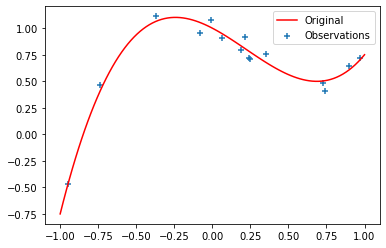

In [487]:
#generation of data 
#np.random.seed(1)


(x,y) = generate_data(15,g, order=1)
x=x[:,1]
#Q5)
plot_points(x,y,g)

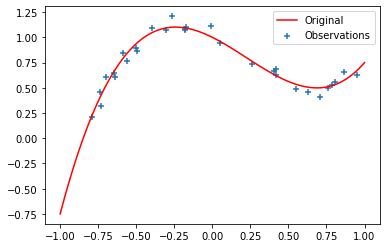

In [298]:
#Q6)
(x_test,y_test)=generate_data(30,g,order=1)
x_test=x_test[:,1]

plot_points(x_test,y_test,g)

In [315]:
#Q7)
X=x[:,np.newaxis]
f=LinearRegression()


In [316]:
f.fit(X,y)

LinearRegression()

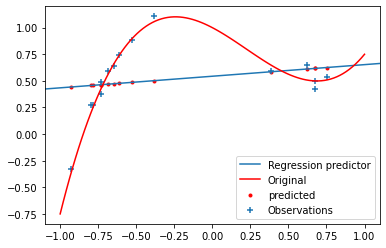

In [317]:
plt.axline((0,f.intercept_),slope=f.coef_, label = "Regression predictor")
plt.scatter(X,f.predict(X), marker=".", color="red", label = "predicted")
plot_points(X,y,g)

In [318]:
#Q8)


In [319]:
pred_test=f.predict(X_test)
pred_train=f.predict(X)

In [320]:
#pour vérifier que la fonction du package fait bien ce que je veux
def mse (x,y):
    x=x.flat[:]
    y=y.flat[:]
    l=len(x)
    agg=x-y
    agg=sum(agg**2)/l
    return agg
    

In [321]:
print(mean_squared_error(pred_test,y_test))
#mse(pred_test,y_test)
print(mse(pred_train,y))


0.11367415655295104
0.09118248403992336


In [313]:
#Q9)


In [322]:
#a)
psi = PolynomialFeatures(2,include_bias=True).fit_transform #J'ai rajouté la constante dans les données et retirée du modele


In [323]:
f=LinearRegression(fit_intercept = False) #Il y a déjà la constante dans les features
f.fit(psi(X),y)
f.coef_

array([ 1.23314674, -0.04070609, -1.58254047])

In [324]:
#b)
x_pred=f.predict(psi(X))

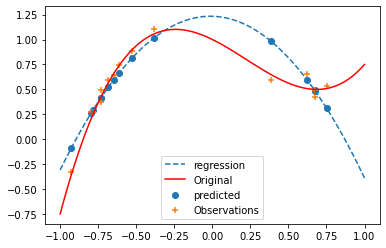

In [325]:
def gpoly(x,coef):
    return sum([coef[i]*x**i for i in range(len(coef))])
    
absplot=np.linspace(-1,1,1000)
ordplot=gpoly(absplot,f.coef_)
plt.plot(absplot, ordplot, linestyle = '--', label='regression')
plt.scatter(x,x_pred, label= "predicted")
plot_points(x,y,g)


In [326]:
#c)
print(mean_squared_error(f.predict(psi(X)),y))
print(mean_squared_error(f.predict(psi(X_test)),y_test))

0.01985534725392385
0.06899809220239983


In [336]:
#Q10)
#a)
def pred_and_features(n):
    def psi(X):
        return PolynomialFeatures(n,include_bias=True).fit_transform(X)
    def reg(X,Y):
        X=psi(X)
        f=LinearRegression(fit_intercept=False)
        f.fit(X,Y)
        def predictor (x):
            return f.predict(x)
        return predictor 
    return(reg, psi)


In [532]:
#b)
(x,y)=generate_data(150,g,order=14, window=(-0.5,0.5)) #changer la fenêtre à (-1,1) pour la Q10)
(x_test,y_test)=generate_data(30,g,order=14)


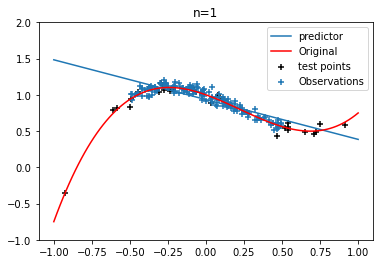

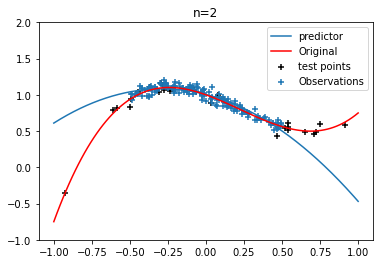

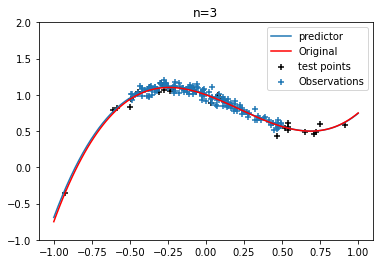

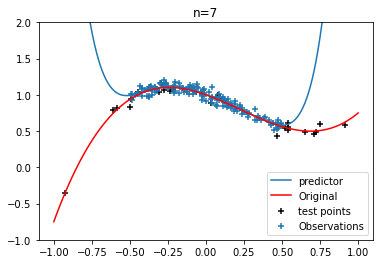

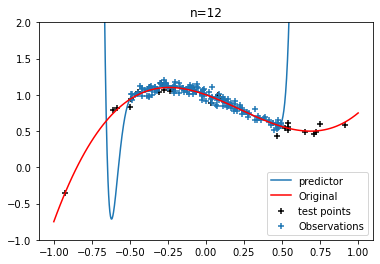

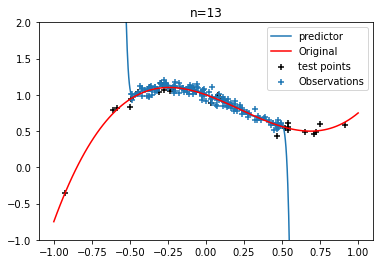

In [533]:
for n in {2,3,4,8,13,14}:
    xn=x.copy()[:,0:n]
    xn_test=x_test.copy()[:,0:n]
    f=LinearRegression(fit_intercept=False)
    f.fit(xn,y)
    plt.figure(n)
    abs=np.linspace(-1,1,1000)
    ord=gpoly(abs,f.coef_)
    plt.scatter(x_test[:,1],y_test, marker ="+", color='black', label = 'test points' )
    plt.plot(abs,ord, label = "predictor")
    plot_points(x[:,1],y,g)
    ax=plt.gca()
    ax.set_ylim([-1, 2])
    plt.title(f"n={n-1}")
    
    

In [534]:
#c)
x3=x.copy()[:,0:4]
f.fit(x3,y)
np.vstack((f.coef_,np.array([1,-0.75,-1,1.5])))

array([[ 1.00535244, -0.76237147, -0.97897269,  1.48082457],
       [ 1.        , -0.75      , -1.        ,  1.5       ]])

In [535]:
#d)
x14=x.copy()
f.fit(x,y)
mean_squared_error(f.predict(x_test),y_test)


3484600106.7110925

In [ ]:
#On conste que l'erreur moyenne explose

(0.0, 1.0)

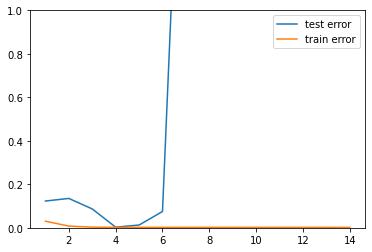

In [536]:
#e)
err_test=[]
err_train=[]
for n in np.arange(1,15,1):
    xn=x.copy()[:,0:n]
    xn_test=x_test.copy()[:,0:n]
    f=LinearRegression(fit_intercept=False)
    f.fit(xn,y)
    err_test.append(mean_squared_error(f.predict(xn_test),y_test))
    err_train.append(mean_squared_error(f.predict(xn),y))

plt.plot(np.arange(1,15,1),err_test, label = "test error")
plt.plot(np.arange(1,15,1),err_train, label = "train error")
plt.legend()
ax=plt.gca()
ax.set_ylim([0, 1])

In [516]:
#On remarque que seul le paramètre n=3 permet de coller au modèle hors de la fenêtre d'apprentissage.
#L'erreur explose rapidement à cause des points hors de la fenêtre dès que n>5
#Poutr un ensemble d'apprentissage couvrant [-1,1], l'erreur explose à n>=13

In [538]:
from sklearn.linear_model import Lasso

In [540]:
#Q11)

In [553]:
(x,y)=generate_data(150,g,order=14, window=(-0.5,0.5)) #changer la fenêtre à (-1,1) pour la Q10)
(x_test,y_test)=generate_data(30,g,order=14)

Text(0, 0.5, 'coeff values')

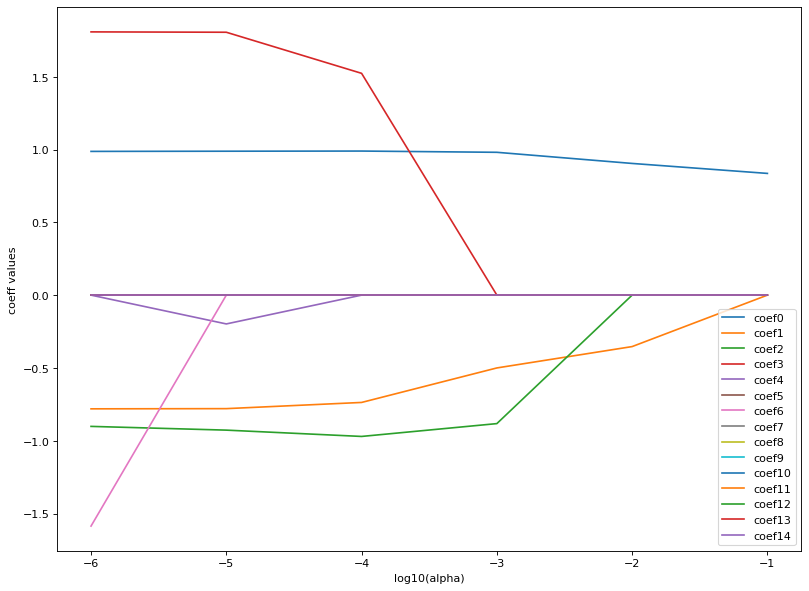

In [607]:
coef=  np.zeros((15,6))
for i in range(0,6):   
    f=Lasso(10**(-(i+1)), fit_intercept=False)
    f.fit(x,y)
    coef[:,i]=f.coef_
    
    
plt.figure(figsize=(12,9), dpi=80)
xplot=np.arange(-1,-7,-1)

for i in range(len(coef)):

     plt.plot(xplot,coef[i], label=f'coef{i}')
plt.legend()
plt.xlabel('log10(alpha)')    
plt.ylabel('coeff values')



In [ ]:
# On remarque que les coefficients diminuent en norme lorsque alpha augmente
# En commencant par les degrés les plus grands (source d'overfitting)